In [1]:
import pandas as pd

In [2]:
df_sample = pd.read_csv('sample_for_error_analysis_annotated.tsv',sep='\t')

In [3]:
df_sample_clean=df_sample.drop_duplicates(['person1','person2'])

In [4]:
all_errors=df_sample_clean['error_sender_final'].tolist()+df_sample_clean['error_receiver_final'].tolist()

In [5]:
df_entities = pd.read_csv('all_lettters_with_entities_final.tsv',sep='\\t')

from PIL import Image
def show_image(filename):
    df_target = df_entities[df_entities['filename'] == filename]
    img_path_big = df_target.iloc[0]['path_to_image']
    img_path = img_path_big.replace('TIF','JPG').replace('tif','jpg')
    print(img_path)
    try:
        img = Image.open(img_path)
    except:
        img = Image.open(img_path_big)
    display(img)

/home/vprovat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
set(all_errors)

{' ambiguous',
 ' corrupted by HTR',
 ' corrupted by OCR',
 ' not detectable in text',
 ' not detectable in text (ambiguous)',
 " not detectable in text (we're looking at one page only",
 ' not detected by NER',
 'corrupted by HTR',
 'corrupted by OCR',
 'detected',
 'detected but ambiguous (differs with annotation)',
 nan,
 'not detectable in text',
 'not detectable in text (ambiguous)',
 'not detectable in text (first name only)',
 'not detectable in text (signature only)',
 'not detected by NER',
 'not detected by NER (first and last name in reverse order)',
 'not linkable to correct name variant',
 'not linkable to correct name variation (ambiguous)',
 'not linked to correct name variant'}

In [26]:
df_sample_clean[df_sample_clean['error_sender_final']=='not linked to correct name variant']

,person1,person2,doc_ids,_merge,doc_id,error_types,error_sender,error_receiver,sender_another_page,receiver_another_page,error_sender_final,error_receiver_final
97,Robert Hilton Barber,Sybren Valkema,1268512,right_only,1268512,"sender not linked to correct name variant, rec...",not linked to correct name variant,NaN,False,False,not linked to correct name variant,NaN


/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_000000011_1_01/Afgeleiden/JPG/226/0001268512.jpg


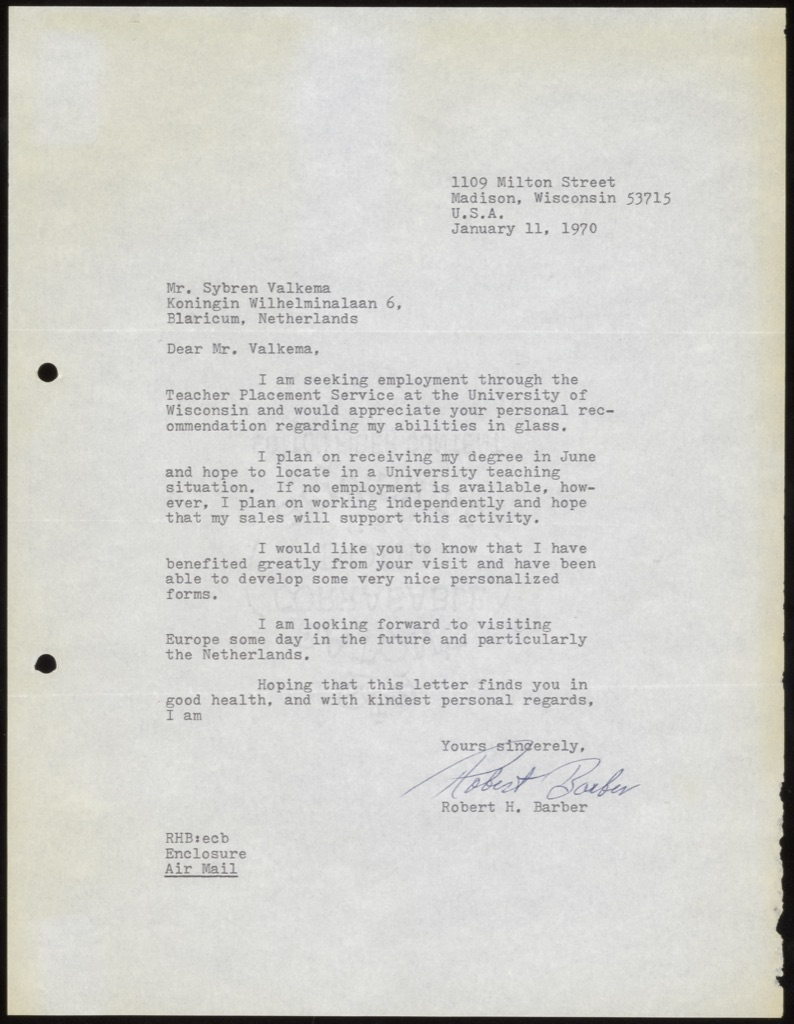

In [24]:
show_image(1268512)

In [29]:
corrupted=[err for err in all_errors if isinstance(err,str) and err.find('corrupted') != -1]

In [30]:
len(corrupted)

37

In [16]:
ner = [err for err in all_errors if isinstance(err,str) and err.find('NER')!=-1]
len(ner)

5

In [17]:
not_detectable = [err for err in all_errors if isinstance(err,str) and err.find('not detectable')!=-1]
len(not_detectable)

56

In [34]:
not_linkable = [err for err in all_errors if isinstance(err,str) and err.find('not linkable')!=-1]
len(not_linkable)+2 # "ambiguous", "'detected but ambiguous (differs with annotation)'"

6

In [19]:
not_linked = [err for err in all_errors if isinstance(err,str) and err.find('not linked')!=-1]
len(not_linked)

1

In [35]:
71/176

0.4034090909090909

In [21]:
df_sample_clean[df_sample_clean['error_receiver_final']=='not detected by NER (first and last name in reverse order)']

,person1,person2,doc_ids,_merge,doc_id,error_types,error_sender,error_receiver,sender_another_page,receiver_another_page,error_sender_final,error_receiver_final
83,H. J. Richartz,Sybren Valkema,1310279,right_only,1310279,receiver not detected by NER (first and last n...,NaN,not detected by NER (first and last name in re...,False,False,NaN,not detected by NER (first and last name in re...


/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_000000015_1_01/Afgeleiden/JPG/419/0001288226.jpg


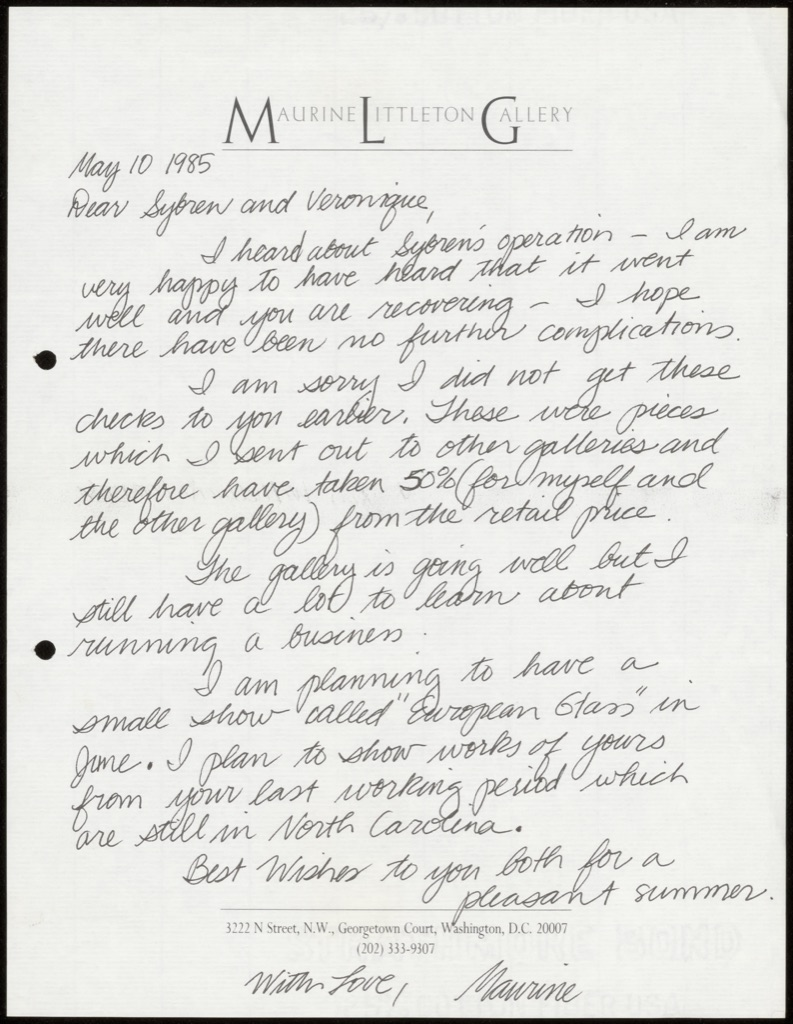

In [27]:
show_image(1288226)

In [13]:
def show_text(filename):
    df_target = df_entities[df_entities['filename'] == filename]
    text = open(df_target.iloc[0]['path_to_text'],'r').read()
    print(text)
    

In [17]:
show_text(1297935)

I will go but I have very much to do now when
Incoming back. I have been sick for tree weeks and
I'm resting at a place old Granna. very very beautiful.
And in march I will have anaribition of my own
in Gotebory. (Glass of course) I'm very glad for this
you can understand. Let's hope we will meet and
if we don't I'm waiting for caster. What a surprise
that Copier became the new direction. I like that
 Kool of yours. I should like to see all the window
andirds in Amsterdam to hadly. But how could
you arrange it. It must be very expenses is it it
I would allso like to go to London to the
Conzess. But... Well... Haybe... Svenske Slöydfore
ningens members are going from Gôteboiz with
a boat on which they plaw to live the days
they are staying in London. But if I'm going I'm
gring alone I think. For me that's better. Well-
like you sad "it is good to make plans
That picture you how in Form I think is rather
poor. I have allso met Per Lutkens (at the congress in
Stockholm) but I couldn't rea